In [3]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import cv2
path = (os.path.abspath(os.path.join(r'..', os.pardir)))
import sys
sys.path.append(path)
from nuclei_segmentation import otsu as ot
from nuclei_segmentation import dicescore as dsc
from nuclei_segmentation import preprocessing as pp
from nuclei_segmentation import local_thresholding as lt
from nuclei_segmentation import two_level_otsu as tlo
import statistics as st
import os
import os.path


Using matplotlib backend: <object object at 0x000001A40F839460>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
def complete_analysis_global_otsu(x):
    if x == 'N2DH-GOWT1':
        
        img_N2DH_GOWT1 = []
        path = os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/img")
        for f in os.listdir(path):
            img_N2DH_GOWT1.append(imread(os.path.join(path , f)))

        gt_N2DH_GOWT1 = []
        path = os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/gt")
        for f in os.listdir(path):
            gt_N2DH_GOWT1.append(imread(os.path.join(path , f)))

        binary_gt_N2DH_GOWT1 = []
        for i in range(0,len(gt_N2DH_GOWT1)):
            binary_gt_N2DH_GOWT1.append(pp.binarize(gt_N2DH_GOWT1[i])) 

        copy_img_N2DH_GOWT1 = img_N2DH_GOWT1.copy()

        median_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            median_img_N2DH_GOWT1.append(scipy.ndimage.median_filter(copy_img_N2DH_GOWT1[i] , 9))

        gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            gauss_img_N2DH_GOWT1.append(scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1[i] , 9))

        stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            stretch_img_N2DH_GOWT1.append(pp.stretch(copy_img_N2DH_GOWT1[i]))

        median_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(median_img_N2DH_GOWT1)):
            median_stretch_img_N2DH_GOWT1.append(pp.stretch(median_img_N2DH_GOWT1[i]))

        stretch_median_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_img_N2DH_GOWT1)):
            stretch_median_img_N2DH_GOWT1.append(scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1[i] , 9))

        gauss_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(gauss_img_N2DH_GOWT1)):
            gauss_stretch_img_N2DH_GOWT1.append(pp.stretch(gauss_img_N2DH_GOWT1[i]))
        
        stretch_gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_img_N2DH_GOWT1)):
            stretch_gauss_img_N2DH_GOWT1.append(scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1[i] , 9))

        otsu_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            otsu_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(copy_img_N2DH_GOWT1[i] , 256),15))

        otsu_median_img_N2DH_GOWT1 = []
        for i in range(0,len(median_img_N2DH_GOWT1)):
            otsu_median_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(median_img_N2DH_GOWT1[i] , 256),15))

        otsu_gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(gauss_img_N2DH_GOWT1)):
            otsu_gauss_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(gauss_img_N2DH_GOWT1[i] , 256),15))

        otsu_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_img_N2DH_GOWT1)):
            otsu_stretch_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(stretch_img_N2DH_GOWT1[i] , 256),15))

        otsu_median_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(median_stretch_img_N2DH_GOWT1)):
            otsu_median_stretch_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1[i] , 256),15))
            
        otsu_stretch_median_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_median_img_N2DH_GOWT1)):
            otsu_stretch_median_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1[i] , 256),15))

        otsu_gauss_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(gauss_stretch_img_N2DH_GOWT1)):
            otsu_gauss_stretch_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1[i] , 256),15))
        
        otsu_stretch_gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_gauss_img_N2DH_GOWT1)):
            otsu_stretch_gauss_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1[i] , 256),15))

        dice_otsu_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_img_N2DH_GOWT1)):
            dice_otsu_img_N2DH_GOWT1.append(dsc.dice(otsu_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_median_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_median_img_N2DH_GOWT1)):
            dice_otsu_median_img_N2DH_GOWT1.append(dsc.dice(otsu_median_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_gauss_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_gauss_img_N2DH_GOWT1)):
            dice_otsu_gauss_img_N2DH_GOWT1.append(dsc.dice(otsu_gauss_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_stretch_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_stretch_img_N2DH_GOWT1)):
            dice_otsu_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_median_stretch_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_median_stretch_img_N2DH_GOWT1)):
            dice_otsu_median_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_median_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))
        
        dice_otsu_stretch_median_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_stretch_median_img_N2DH_GOWT1)):
            dice_otsu_stretch_median_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_median_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        #dice_both_stretch_median = [dice_otsu_median_stretch_img_N2DH_GOWT1 , dice_otsu_stretch_median_img_N2DH_GOWT1]
        median1 = st.median(dice_otsu_median_stretch_img_N2DH_GOWT1)
        median2 = st.median(dice_otsu_stretch_median_img_N2DH_GOWT1)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_N2DH_GOWT1
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_N2DH_GOWT1
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(np.median(dice_both_stretch_median))]
        
        dice_otsu_gauss_stretch_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_gauss_stretch_img_N2DH_GOWT1)):
            dice_otsu_gauss_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))
        
        dice_otsu_stretch_gauss_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_stretch_gauss_img_N2DH_GOWT1)):
            dice_otsu_stretch_gauss_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        median3 = st.median(dice_otsu_gauss_stretch_img_N2DH_GOWT1)
        median4 = st.median(dice_otsu_stretch_gauss_img_N2DH_GOWT1)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_N2DH_GOWT1
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_N2DH_GOWT1

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_N2DH_GOWT1 , dice_otsu_stretch_gauss_img_N2DH_GOWT1]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]

        data_N2DH_GOWT1 = [dice_otsu_img_N2DH_GOWT1 , dice_otsu_median_img_N2DH_GOWT1 , dice_otsu_gauss_img_N2DH_GOWT1 , dice_otsu_stretch_img_N2DH_GOWT1  , optimal_dice_stretch_median  , optimal_dice_stretch_gauss]
        print(data_N2DH_GOWT1)
        boxplot = pp.dataset_boxplot_otsu(data_N2DH_GOWT1 , 'Preprocessing methods - N2DH-GOWT1')
    
    
    if x == 'N2DL-HeLa' :     
        
        img_N2DL_HeLa = []
        path = os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)),r"data/Otsu_data/N2DL-HeLa/img")
        for f in os.listdir(path):
            img_N2DL_HeLa.append(imread(os.path.join(path , f)))

        gt_N2DL_HeLa = []
        path = os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)),r"data/Otsu_data/N2DL-HeLa/gt")
        for f in os.listdir(path):
            gt_N2DL_HeLa.append(imread(os.path.join(path , f)))

        binary_gt_N2DL_HeLa = []
        for i in range(0,len(gt_N2DL_HeLa)):
            binary_gt_N2DL_HeLa.append(pp.binarize(gt_N2DL_HeLa[i])) 

        copy_img_N2DL_HeLa = img_N2DL_HeLa.copy()

        median_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            median_img_N2DL_HeLa.append(scipy.ndimage.median_filter(copy_img_N2DL_HeLa[i] , 2))

        gauss_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            gauss_img_N2DL_HeLa.append(scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa[i] , 4))

        stretch_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            stretch_img_N2DL_HeLa.append(pp.stretch(copy_img_N2DL_HeLa[i]))

        median_stretch_img_N2DL_HeLa = []
        for i in range(0,len(median_img_N2DL_HeLa)):
            median_stretch_img_N2DL_HeLa.append(pp.stretch(median_img_N2DL_HeLa[i]))

        stretch_median_img_N2DL_HeLa = []
        for i in range(0,len(stretch_img_N2DL_HeLa)):
            stretch_median_img_N2DL_HeLa.append(scipy.ndimage.median_filter(stretch_img_N2DL_HeLa[i] , 2))
        
        gauss_stretch_img_N2DL_HeLa = []
        for i in range(0,len(gauss_img_N2DL_HeLa)):
            gauss_stretch_img_N2DL_HeLa.append(pp.stretch(gauss_img_N2DL_HeLa[i]))
        
        stretch_gauss_img_N2DL_HeLa = []
        for i in range(0,len(stretch_img_N2DL_HeLa)):
            stretch_gauss_img_N2DL_HeLa.append(scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa[i] , 4))

        otsu_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            otsu_img_N2DL_HeLa.append(ot.otsu_thresholding(copy_img_N2DL_HeLa[i] , 256))

        otsu_median_img_N2DL_HeLa = []
        for i in range(0,len(median_img_N2DL_HeLa)):
            otsu_median_img_N2DL_HeLa.append(ot.otsu_thresholding(median_img_N2DL_HeLa[i] , 256))

        otsu_gauss_img_N2DL_HeLa = []
        for i in range(0,len(gauss_img_N2DL_HeLa)):
            otsu_gauss_img_N2DL_HeLa.append(ot.otsu_thresholding(gauss_img_N2DL_HeLa[i] , 256))

        otsu_stretch_img_N2DL_HeLa = []
        for i in range(0,len(stretch_img_N2DL_HeLa)):
            otsu_stretch_img_N2DL_HeLa.append(ot.otsu_thresholding(stretch_img_N2DL_HeLa[i] , 256))

        otsu_median_stretch_img_N2DL_HeLa = []
        for i in range(0,len(median_stretch_img_N2DL_HeLa)):
            otsu_median_stretch_img_N2DL_HeLa.append(ot.otsu_thresholding(median_stretch_img_N2DL_HeLa[i] , 256))
        
        otsu_stretch_median_img_N2DL_HeLa = []
        for i in range(0,len(stretch_median_img_N2DL_HeLa)):
            otsu_stretch_median_img_N2DL_HeLa.append(ot.otsu_thresholding(stretch_median_img_N2DL_HeLa[i] , 256))
        
        otsu_gauss_stretch_img_N2DL_HeLa = []
        for i in range(0,len(gauss_stretch_img_N2DL_HeLa)):
            otsu_gauss_stretch_img_N2DL_HeLa.append(ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa[i] , 256))
        
        otsu_stretch_gauss_img_N2DL_HeLa = []
        for i in range(0,len(stretch_gauss_img_N2DL_HeLa)):
            otsu_stretch_gauss_img_N2DL_HeLa.append(ot.otsu_thresholding(stretch_gauss_img_N2DL_HeLa[i] , 256))

        dice_otsu_img_N2DL_HeLa = []
        for j in range(0,len(otsu_img_N2DL_HeLa)):
            dice_otsu_img_N2DL_HeLa.append(dsc.dice(otsu_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_median_img_N2DL_HeLa = []
        for j in range(0,len(otsu_median_img_N2DL_HeLa)):
            dice_otsu_median_img_N2DL_HeLa.append(dsc.dice(otsu_median_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_gauss_img_N2DL_HeLa = []
        for j in range(0,len(otsu_gauss_img_N2DL_HeLa)):
            dice_otsu_gauss_img_N2DL_HeLa.append(dsc.dice(otsu_gauss_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_stretch_img_N2DL_HeLa = []
        for j in range(0,len(otsu_stretch_img_N2DL_HeLa)):
            dice_otsu_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_median_stretch_img_N2DL_HeLa = []
        for j in range(0,len(otsu_median_stretch_img_N2DL_HeLa)):
            dice_otsu_median_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_median_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_stretch_median_img_N2DL_HeLa = []
        for j in range(0,len(otsu_stretch_median_img_N2DL_HeLa)):
            dice_otsu_stretch_median_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_median_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))
        
        median1 = st.median(dice_otsu_median_stretch_img_N2DL_HeLa)
        median2 = st.median(dice_otsu_stretch_median_img_N2DL_HeLa)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_N2DL_HeLa
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_N2DL_HeLa

        #dice_both_stretch_median = [dice_otsu_median_stretch_img_N2DL_HeLa , dice_otsu_stretch_median_img_N2DL_HeLa]
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(st.median(dice_both_stretch_median))]
        
        dice_otsu_gauss_stretch_img_N2DL_HeLa = []
        for j in range(0,len(otsu_gauss_stretch_img_N2DL_HeLa)):
            dice_otsu_gauss_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))    
        
        dice_otsu_stretch_gauss_img_N2DL_HeLa = []
        for j in range(0,len(otsu_stretch_gauss_img_N2DL_HeLa)):
            dice_otsu_stretch_gauss_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_N2DL_HeLa , dice_otsu_stretch_gauss_img_N2DL_HeLa]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]

        median3 = st.median(dice_otsu_gauss_stretch_img_N2DL_HeLa)
        median4 = st.median(dice_otsu_stretch_gauss_img_N2DL_HeLa)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_N2DL_HeLa
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_N2DL_HeLa

        data_N2DLHeLa = [dice_otsu_img_N2DL_HeLa , dice_otsu_median_img_N2DL_HeLa , dice_otsu_gauss_img_N2DL_HeLa , dice_otsu_stretch_img_N2DL_HeLa , optimal_dice_stretch_median , optimal_dice_stretch_gauss]
        print(data_N2DLHeLa)
        boxplot = pp.dataset_boxplot_otsu(data_N2DLHeLa , 'Preprocessing methods - N2DL-HeLa')

    
    if x == 'NIH3T3' :
        
        img_NIH3T3 = []
        path = os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)),r"data/Otsu_data/NIH3T3/img")
        for f in os.listdir(path):
            img_NIH3T3.append(imread(os.path.join(path , f)))

        gt_NIH3T3 = []
        path = os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)),r"data/Otsu_data/NIH3T3/gt")
        for f in os.listdir(path):
            gt_NIH3T3.append(imread(os.path.join(path , f)))

        copy_img_NIH3T3 = img_NIH3T3.copy()

        median_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            median_img_NIH3T3.append(scipy.ndimage.median_filter(copy_img_NIH3T3[i] , 16))

        gauss_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(copy_img_NIH3T3[i] , 8))

        stretch_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            stretch_img_NIH3T3.append(pp.stretch(copy_img_NIH3T3[i]))

        median_stretch_img_NIH3T3 = []
        for i in range(0,len(median_img_NIH3T3)):
            median_stretch_img_NIH3T3.append(pp.stretch(median_img_NIH3T3[i]))

        stretch_median_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            stretch_median_img_NIH3T3.append(scipy.ndimage.median_filter(stretch_img_NIH3T3[i] , 16))

        gauss_stretch_img_NIH3T3 = []
        for i in range(0,len(gauss_img_NIH3T3)):
            gauss_stretch_img_NIH3T3.append(pp.stretch(gauss_img_NIH3T3[i]))

        stretch_gauss_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            stretch_gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(stretch_img_NIH3T3[i] , 8))

        otsu_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            otsu_img_NIH3T3.append(ot.otsu_thresholding(copy_img_NIH3T3[i] , 256))

        otsu_median_img_NIH3T3 = []
        for i in range(0,len(median_img_NIH3T3)):
            otsu_median_img_NIH3T3.append(ot.otsu_thresholding(median_img_NIH3T3[i] , 256))

        otsu_gauss_img_NIH3T3 = []
        for i in range(0,len(gauss_img_NIH3T3)):
            otsu_gauss_img_NIH3T3.append(ot.otsu_thresholding(gauss_img_NIH3T3[i] , 256))

        otsu_stretch_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            otsu_stretch_img_NIH3T3.append(ot.otsu_thresholding(stretch_img_NIH3T3[i] , 256))
        
        otsu_median_stretch_img_NIH3T3 = []
        for i in range(0,len(median_stretch_img_NIH3T3)):
            otsu_median_stretch_img_NIH3T3.append(ot.otsu_thresholding(median_stretch_img_NIH3T3[i] , 256))
        
        otsu_stretch_median_img_NIH3T3 = []
        for i in range(0,len(stretch_median_img_NIH3T3)):
            otsu_stretch_median_img_NIH3T3.append(ot.otsu_thresholding(stretch_median_img_NIH3T3[i] , 256))
        
        otsu_gauss_stretch_img_NIH3T3 = []
        for i in range(0,len(gauss_stretch_img_NIH3T3)):
            otsu_gauss_stretch_img_NIH3T3.append(ot.otsu_thresholding(gauss_stretch_img_NIH3T3[i] , 256))

        otsu_stretch_gauss_img_NIH3T3 = []
        for i in range(0,len(stretch_gauss_img_NIH3T3)):
            otsu_stretch_gauss_img_NIH3T3.append(ot.otsu_thresholding(stretch_gauss_img_NIH3T3[i] , 256))

        dice_otsu_img_NIH3T3 = []
        for j in range(0,len(otsu_img_NIH3T3)):
            dice_otsu_img_NIH3T3.append(dsc.dice(otsu_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_median_img_NIH3T3 = []
        for j in range(0,len(otsu_median_img_NIH3T3)):
            dice_otsu_median_img_NIH3T3.append(dsc.dice(otsu_median_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_gauss_img_NIH3T3 = []
        for j in range(0,len(otsu_gauss_img_NIH3T3)):
            dice_otsu_gauss_img_NIH3T3.append(dsc.dice(otsu_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_img_NIH3T3)):
            dice_otsu_stretch_img_NIH3T3.append(dsc.dice(otsu_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        dice_otsu_median_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_median_stretch_img_NIH3T3)):
            dice_otsu_median_stretch_img_NIH3T3.append(dsc.dice(otsu_median_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_stretch_median_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_median_img_NIH3T3)):
            dice_otsu_stretch_median_img_NIH3T3.append(dsc.dice(otsu_stretch_median_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        #dice_both_stretch_median = [dice_otsu_median_stretch_img_NIH3T3 , dice_otsu_stretch_median_img_NIH3T3]
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(st.median(dice_both_stretch_median))]
        
        
        median1 = st.median(dice_otsu_median_stretch_img_NIH3T3)
        median2 = st.median(dice_otsu_stretch_median_img_NIH3T3)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_NIH3T3
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_NIH3T3

        dice_otsu_gauss_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_gauss_stretch_img_NIH3T3)):
            dice_otsu_gauss_stretch_img_NIH3T3.append(dsc.dice(otsu_gauss_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        dice_otsu_stretch_gauss_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_gauss_img_NIH3T3)):
            dice_otsu_stretch_gauss_img_NIH3T3.append(dsc.dice(otsu_stretch_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_NIH3T3, dice_otsu_stretch_gauss_img_NIH3T3]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]
        
        median3 = st.median(dice_otsu_gauss_stretch_img_NIH3T3)
        median4 = st.median(dice_otsu_stretch_gauss_img_NIH3T3)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_NIH3T3
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_NIH3T3

        data_NIH3T3 = [dice_otsu_img_NIH3T3 , dice_otsu_median_img_NIH3T3 , dice_otsu_gauss_img_NIH3T3 , dice_otsu_stretch_img_NIH3T3 , optimal_dice_stretch_median , optimal_dice_stretch_gauss]
        print(data_NIH3T3)
        boxplot = pp.dataset_boxplot_otsu(data_NIH3T3 , 'Preprocessing methods - NIH3T3')
        
    return boxplot



ACHTUNG Hole filling muss noch rein!!! für N2DH-GOWT1


[[0.8554654126169282, 0.7693969459664283, 0.7856115349995373, 0.7833766399387863, 0.904528476722703, 0.884250384006287], [0.6327826522277554, 0.5614904047043956, 0.6188381296346103, 0.6492295143014204, 0.6307374670281629, 0.6537898232334218], [0.6096807589823662, 0.5801316006881336, 0.6305592652896946, 0.6577469553450609, 0.6070292982057688, 0.5878604963112005], [0.6573057536130297, 0.8889624027757476, 0.8888822505843782, 0.8840789866507442, 0.8466965877165696, 0.915678984885556], [0.8187569108565325, 0.8003354141432963, 0.8091431569799379, 0.7855922030637635, 0.7693329038958308, 0.7614840989399293], [0.7835910390780781, 0.7780721879342101, 0.7858915720953467, 0.7767091122550348, 0.785076425145881, 0.7558159530301913]]
Line2D(_child6)


c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


[[0.6961222399023476, 0.65534219596258, 0.7806862514268343, 0.7806012094816297], [0.7103253973374626, 0.6694136857682298, 0.7834791648873352, 0.7823174073771735], [0.7316009375318455, 0.6874533683121135, 0.7635625807166325, 0.7646670453136668], [0.809730635140136, 0.8146261556413248, 0.7972511209448173, 0.795759151830366], [0.8083639705882353, 0.8141226945021894, 0.8011127367379153, 0.8013222347823108], [0.7901147146296559, 0.8031289427201614, 0.7853768764335839, 0.7862647140684347]]
Line2D(_child6)


c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


[[0.8943783223933183, 0.8845252721173281, 0.8248360803970239, 0.7345417270163801, 0.7304073649082119, 0.6728102311790894, 0.6711519137663287, 0.7237186625334818, 0.03844935467277361, 0.482970126366923, 0.0, 0.680536637820677, 0.00026339009389856846, 0.5757554586315079, 0.6165448260228947, 0.07605520913993832, 0.07186834004262373, 0.7965485556767932], [0.9080295797878731, 0.8787593324241103, 0.8240269286695534, 0.7274386713178076, 0.7667266042242559, 0.686254450403353, 0.6688452252743613, 0.7163285596108164, 0.03312478286129691, 0.4535714182153493, 0.0, 0.6756700217767795, 0.0, 0.5720907326399953, 0.6104348417019902, 0.047324730943574624, 0.074196645109135, 0.7870066342425532], [0.907993566318502, 0.8914642943015147, 0.8069740429717168, 0.7264822742303453, 0.743519705020811, 0.6420592182889145, 0.6207132472419397, 0.7029986736549683, 0.030260801481780123, 0.45019557165768614, 0.5434791870819309, 0.6601628541706102, 0.00044470409738147764, 0.5661672581481676, 0.5944399257544475, 0.049542

c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


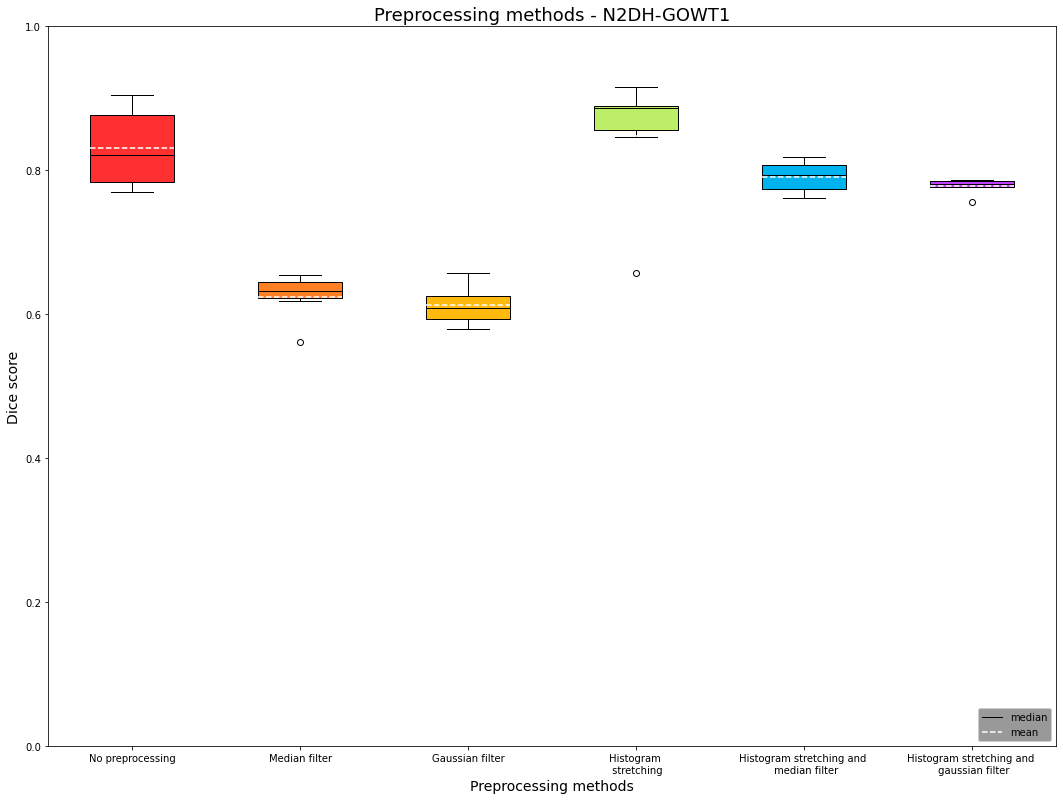

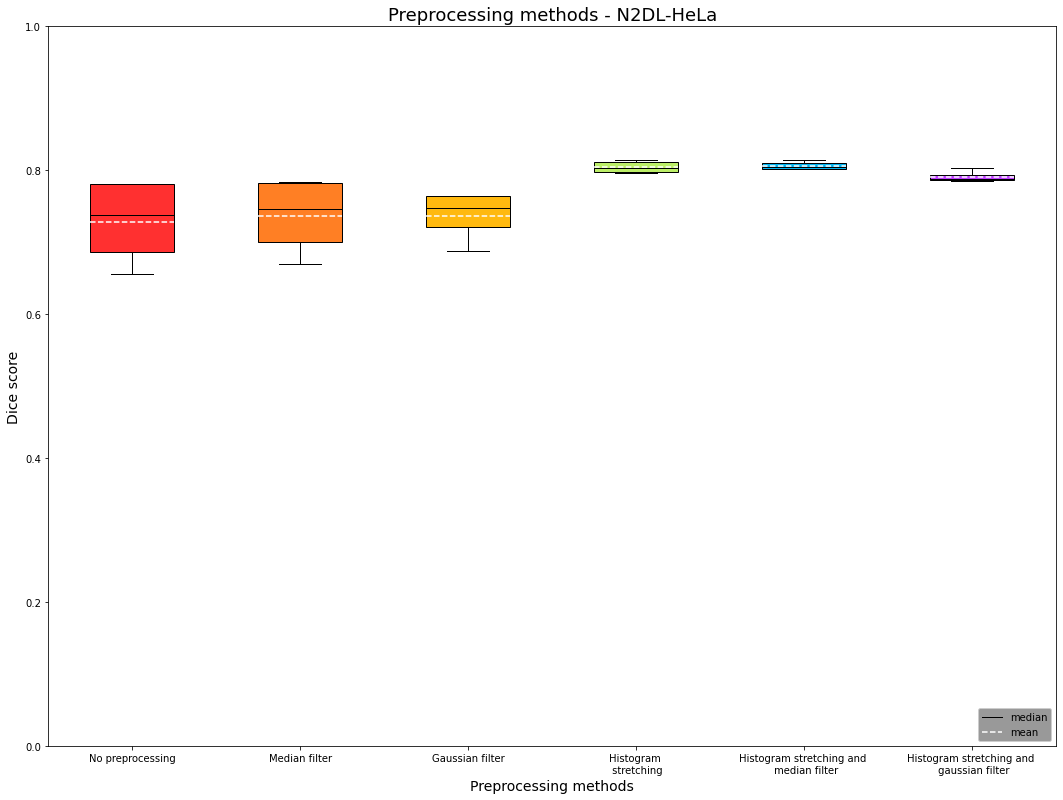

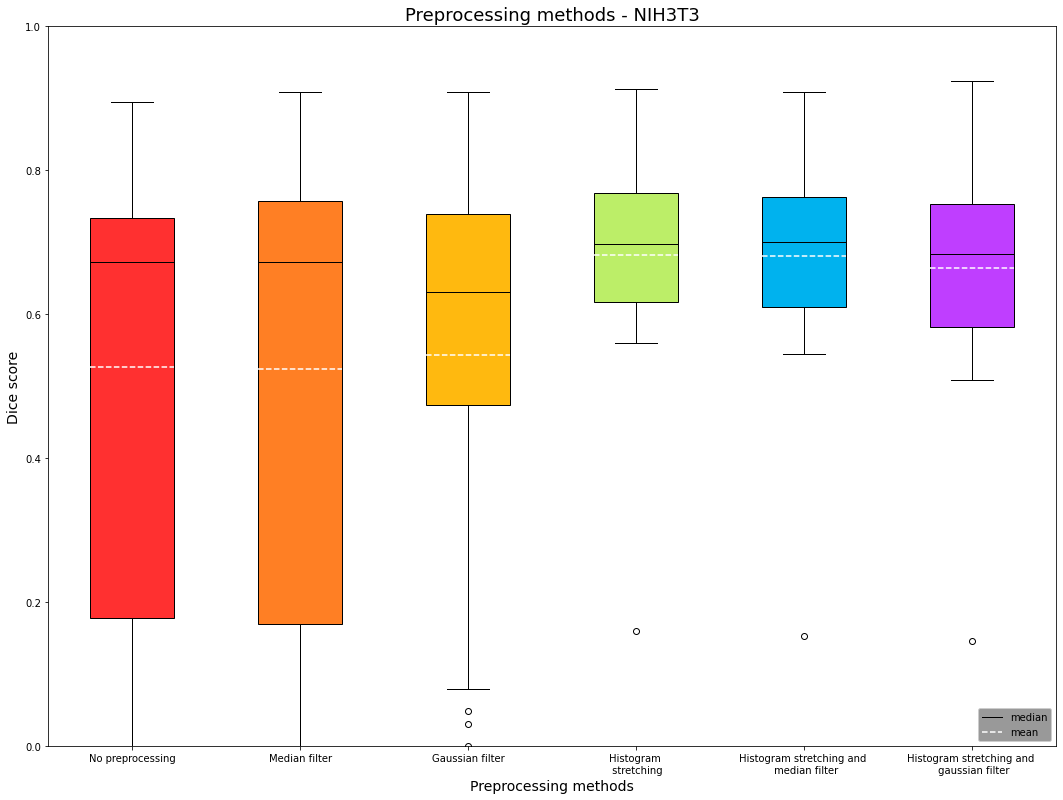

In [5]:
complete_analysis_global_otsu("N2DH-GOWT1")
complete_analysis_global_otsu("N2DL-HeLa")
complete_analysis_global_otsu("NIH3T3")

In [2]:
def complete_analysis_two_level_otsu(x):
    if x == 'N2DH-GOWT1':
        
        img_N2DH_GOWT1 = []
        path = r"data/Otsu_data/N2DH-GOWT1/img"
        for f in os.listdir(path):
            img_N2DH_GOWT1.append(imread(os.path.join(path , f)))

        gt_N2DH_GOWT1 = []
        path = r"data/Otsu_data/N2DH-GOWT1/gt"
        for f in os.listdir(path):
            gt_N2DH_GOWT1.append(imread(os.path.join(path , f)))

        binary_gt_N2DH_GOWT1 = []
        for i in range(0,len(gt_N2DH_GOWT1)):
            binary_gt_N2DH_GOWT1.append(pp.binarize(gt_N2DH_GOWT1[i])) 

        copy_img_N2DH_GOWT1 = img_N2DH_GOWT1.copy()

        median_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            median_img_N2DH_GOWT1.append(scipy.ndimage.median_filter(copy_img_N2DH_GOWT1[i] , 9))

        gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            gauss_img_N2DH_GOWT1.append(scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1[i] , 9))

        stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            stretch_img_N2DH_GOWT1.append(pp.stretch(copy_img_N2DH_GOWT1[i]))
        
        median_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(median_img_N2DH_GOWT1)):
            median_stretch_img_N2DH_GOWT1.append(pp.stretch(median_img_N2DH_GOWT1[i]))

        stretch_median_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_img_N2DH_GOWT1)):
            stretch_median_img_N2DH_GOWT1.append(scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1[i] , 9))

        gauss_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(gauss_img_N2DH_GOWT1)):
            gauss_stretch_img_N2DH_GOWT1.append(pp.stretch(gauss_img_N2DH_GOWT1[i]))
        
        stretch_gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_img_N2DH_GOWT1)):
            stretch_gauss_img_N2DH_GOWT1.append(scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1[i] , 9))
        
        otsu_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            otsu_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(copy_img_N2DH_GOWT1[i] , 256),15))

        otsu_median_img_N2DH_GOWT1 = []
        for i in range(0,len(median_img_N2DH_GOWT1)):
            otsu_median_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(median_img_N2DH_GOWT1[i] , 256),15))

        otsu_gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(gauss_img_N2DH_GOWT1)):
            otsu_gauss_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(gauss_img_N2DH_GOWT1[i] , 256),15))
        
        otsu_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_img_N2DH_GOWT1)):
            otsu_stretch_img_N2DH_GOWT1.append((tlo.two_level_otsu_thresholding(stretch_img_N2DH_GOWT1[i] , 256)))
        
        
        otsu_median_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(median_stretch_img_N2DH_GOWT1)):
            otsu_median_stretch_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(median_stretch_img_N2DH_GOWT1[i] , 256),15))
            
        otsu_stretch_median_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_median_img_N2DH_GOWT1)):
            otsu_stretch_median_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(stretch_median_img_N2DH_GOWT1[i] , 256),15))

        otsu_gauss_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(gauss_stretch_img_N2DH_GOWT1)):
            otsu_gauss_stretch_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(gauss_stretch_img_N2DH_GOWT1[i] , 256),15))
        
        otsu_stretch_gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_gauss_img_N2DH_GOWT1)):
            otsu_stretch_gauss_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(stretch_gauss_img_N2DH_GOWT1[i] , 256),15))
       
        dice_otsu_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_img_N2DH_GOWT1)):
            dice_otsu_img_N2DH_GOWT1.append(dsc.dice(otsu_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_median_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_median_img_N2DH_GOWT1)):
            dice_otsu_median_img_N2DH_GOWT1.append(dsc.dice(otsu_median_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_gauss_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_gauss_img_N2DH_GOWT1)):
            dice_otsu_gauss_img_N2DH_GOWT1.append(dsc.dice(otsu_gauss_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))
        
        dice_otsu_stretch_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_stretch_img_N2DH_GOWT1)):
            dice_otsu_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))
        
        dice_otsu_median_stretch_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_median_stretch_img_N2DH_GOWT1)):
            dice_otsu_median_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_median_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))
        
        dice_otsu_stretch_median_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_stretch_median_img_N2DH_GOWT1)):
            dice_otsu_stretch_median_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_median_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        #dice_both_stretch_median = [dice_otsu_median_stretch_img_N2DH_GOWT1 , dice_otsu_stretch_median_img_N2DH_GOWT1]
        median1 = st.median(dice_otsu_median_stretch_img_N2DH_GOWT1)
        median2 = st.median(dice_otsu_stretch_median_img_N2DH_GOWT1)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_N2DH_GOWT1
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_N2DH_GOWT1
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(np.median(dice_both_stretch_median))]
        
        dice_otsu_gauss_stretch_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_gauss_stretch_img_N2DH_GOWT1)):
            dice_otsu_gauss_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))
        
        dice_otsu_stretch_gauss_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_stretch_gauss_img_N2DH_GOWT1)):
            dice_otsu_stretch_gauss_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        median3 = st.median(dice_otsu_gauss_stretch_img_N2DH_GOWT1)
        median4 = st.median(dice_otsu_stretch_gauss_img_N2DH_GOWT1)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_N2DH_GOWT1
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_N2DH_GOWT1

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_N2DH_GOWT1 , dice_otsu_stretch_gauss_img_N2DH_GOWT1]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]

        data_N2DH_GOWT1 = [dice_otsu_img_N2DH_GOWT1 , dice_otsu_median_img_N2DH_GOWT1 , dice_otsu_gauss_img_N2DH_GOWT1 , dice_otsu_stretch_img_N2DH_GOWT1  , optimal_dice_stretch_median  , optimal_dice_stretch_gauss]

        boxplot = pp.dataset_boxplot_otsu(data_N2DH_GOWT1 , 'Preprocessing methods - N2DH-GOWT1-two-level-Otsu')
        
    
    if x == 'N2DL-HeLa' :     
        
        img_N2DL_HeLa = []
        path = os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)),r"data/Otsu_data/N2DL-HeLa/img")
        for f in os.listdir(path):
            img_N2DL_HeLa.append(imread(os.path.join(path , f)))

        gt_N2DL_HeLa = []
        path = os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)),r"data/Otsu_data/N2DL-HeLa/gt")
        for f in os.listdir(path):
            gt_N2DL_HeLa.append(imread(os.path.join(path , f)))

        binary_gt_N2DL_HeLa = []
        for i in range(0,len(gt_N2DL_HeLa)):
            binary_gt_N2DL_HeLa.append(pp.binarize(gt_N2DL_HeLa[i])) 

        copy_img_N2DL_HeLa = img_N2DL_HeLa.copy()

        median_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            median_img_N2DL_HeLa.append(scipy.ndimage.median_filter(copy_img_N2DL_HeLa[i] , 2))

        gauss_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            gauss_img_N2DL_HeLa.append(scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa[i] , 4))

        stretch_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            stretch_img_N2DL_HeLa.append(pp.stretch(copy_img_N2DL_HeLa[i]))

        median_stretch_img_N2DL_HeLa = []
        for i in range(0,len(median_img_N2DL_HeLa)):
            median_stretch_img_N2DL_HeLa.append(pp.stretch(median_img_N2DL_HeLa[i]))

        stretch_median_img_N2DL_HeLa = []
        for i in range(0,len(stretch_img_N2DL_HeLa)):
            stretch_median_img_N2DL_HeLa.append(scipy.ndimage.median_filter(stretch_img_N2DL_HeLa[i] , 2))
        
        gauss_stretch_img_N2DL_HeLa = []
        for i in range(0,len(gauss_img_N2DL_HeLa)):
            gauss_stretch_img_N2DL_HeLa.append(pp.stretch(gauss_img_N2DL_HeLa[i]))
        
        stretch_gauss_img_N2DL_HeLa = []
        for i in range(0,len(stretch_img_N2DL_HeLa)):
            stretch_gauss_img_N2DL_HeLa.append(scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa[i] , 4))

        otsu_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            otsu_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(copy_img_N2DL_HeLa[i] , 256))

        otsu_median_img_N2DL_HeLa = []
        for i in range(0,len(median_img_N2DL_HeLa)):
            otsu_median_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(median_img_N2DL_HeLa[i] , 256))

        otsu_gauss_img_N2DL_HeLa = []
        for i in range(0,len(gauss_img_N2DL_HeLa)):
            otsu_gauss_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(gauss_img_N2DL_HeLa[i] , 256))

        otsu_stretch_img_N2DL_HeLa = []
        for i in range(0,len(stretch_img_N2DL_HeLa)):
            otsu_stretch_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(stretch_img_N2DL_HeLa[i] , 256))

        otsu_median_stretch_img_N2DL_HeLa = []
        for i in range(0,len(median_stretch_img_N2DL_HeLa)):
            otsu_median_stretch_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(median_stretch_img_N2DL_HeLa[i] , 256))
        
        otsu_stretch_median_img_N2DL_HeLa = []
        for i in range(0,len(stretch_median_img_N2DL_HeLa)):
            otsu_stretch_median_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(stretch_median_img_N2DL_HeLa[i] , 256))
        
        otsu_gauss_stretch_img_N2DL_HeLa = []
        for i in range(0,len(gauss_stretch_img_N2DL_HeLa)):
            otsu_gauss_stretch_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(gauss_stretch_img_N2DL_HeLa[i] , 256))
        
        otsu_stretch_gauss_img_N2DL_HeLa = []
        for i in range(0,len(stretch_gauss_img_N2DL_HeLa)):
            otsu_stretch_gauss_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(stretch_gauss_img_N2DL_HeLa[i] , 256))

        dice_otsu_img_N2DL_HeLa = []
        for j in range(0,len(otsu_img_N2DL_HeLa)):
            dice_otsu_img_N2DL_HeLa.append(dsc.dice(otsu_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_median_img_N2DL_HeLa = []
        for j in range(0,len(otsu_median_img_N2DL_HeLa)):
            dice_otsu_median_img_N2DL_HeLa.append(dsc.dice(otsu_median_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_gauss_img_N2DL_HeLa = []
        for j in range(0,len(otsu_gauss_img_N2DL_HeLa)):
            dice_otsu_gauss_img_N2DL_HeLa.append(dsc.dice(otsu_gauss_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_stretch_img_N2DL_HeLa = []
        for j in range(0,len(otsu_stretch_img_N2DL_HeLa)):
            dice_otsu_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_median_stretch_img_N2DL_HeLa = []
        for j in range(0,len(otsu_median_stretch_img_N2DL_HeLa)):
            dice_otsu_median_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_median_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_stretch_median_img_N2DL_HeLa = []
        for j in range(0,len(otsu_stretch_median_img_N2DL_HeLa)):
            dice_otsu_stretch_median_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_median_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))
        
        median1 = st.median(dice_otsu_median_stretch_img_N2DL_HeLa)
        median2 = st.median(dice_otsu_stretch_median_img_N2DL_HeLa)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_N2DL_HeLa
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_N2DL_HeLa

        #dice_both_stretch_median = [dice_otsu_median_stretch_img_N2DL_HeLa , dice_otsu_stretch_median_img_N2DL_HeLa]
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(st.median(dice_both_stretch_median))]
        
        dice_otsu_gauss_stretch_img_N2DL_HeLa = []
        for j in range(0,len(otsu_gauss_stretch_img_N2DL_HeLa)):
            dice_otsu_gauss_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))    
        
        dice_otsu_stretch_gauss_img_N2DL_HeLa = []
        for j in range(0,len(otsu_stretch_gauss_img_N2DL_HeLa)):
            dice_otsu_stretch_gauss_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_N2DL_HeLa , dice_otsu_stretch_gauss_img_N2DL_HeLa]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]

        median3 = st.median(dice_otsu_gauss_stretch_img_N2DL_HeLa)
        median4 = st.median(dice_otsu_stretch_gauss_img_N2DL_HeLa)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_N2DL_HeLa
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_N2DL_HeLa

        data_N2DLHeLa = [dice_otsu_img_N2DL_HeLa , dice_otsu_median_img_N2DL_HeLa , dice_otsu_gauss_img_N2DL_HeLa , dice_otsu_stretch_img_N2DL_HeLa , optimal_dice_stretch_median , optimal_dice_stretch_gauss]

        boxplot = pp.dataset_boxplot_otsu(data_N2DLHeLa , 'Preprocessing methods - N2DL-HeLa - Two-level Otsu thresholding')

    
    if x == 'NIH3T3' :
        
        img_NIH3T3 = []
        path = os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)),r"data/Otsu_data/NIH3T3/img")
        for f in os.listdir(path):
            img_NIH3T3.append(imread(os.path.join(path , f)))

        gt_NIH3T3 = []
        path = os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)),r"data/Otsu_data/NIH3T3/gt")
        for f in os.listdir(path):
            gt_NIH3T3.append(imread(os.path.join(path , f)))

        copy_img_NIH3T3 = img_NIH3T3.copy()

        median_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            median_img_NIH3T3.append(scipy.ndimage.median_filter(copy_img_NIH3T3[i] , 16))

        gauss_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(copy_img_NIH3T3[i] , 8))

        stretch_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            stretch_img_NIH3T3.append(pp.stretch(copy_img_NIH3T3[i]))

        median_stretch_img_NIH3T3 = []
        for i in range(0,len(median_img_NIH3T3)):
            median_stretch_img_NIH3T3.append(pp.stretch(median_img_NIH3T3[i]))

        stretch_median_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            stretch_median_img_NIH3T3.append(scipy.ndimage.median_filter(stretch_img_NIH3T3[i] , 16))

        gauss_stretch_img_NIH3T3 = []
        for i in range(0,len(gauss_img_NIH3T3)):
            gauss_stretch_img_NIH3T3.append(pp.stretch(gauss_img_NIH3T3[i]))

        stretch_gauss_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            stretch_gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(stretch_img_NIH3T3[i] , 8))

        otsu_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            otsu_img_NIH3T3.append(tlo.two_level_otsu_thresholding(copy_img_NIH3T3[i] , 256))

        otsu_median_img_NIH3T3 = []
        for i in range(0,len(median_img_NIH3T3)):
            otsu_median_img_NIH3T3.append(tlo.two_level_otsu_thresholding(median_img_NIH3T3[i] , 256))

        otsu_gauss_img_NIH3T3 = []
        for i in range(0,len(gauss_img_NIH3T3)):
            otsu_gauss_img_NIH3T3.append(tlo.two_level_otsu_thresholding(gauss_img_NIH3T3[i] , 256))

        otsu_stretch_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            otsu_stretch_img_NIH3T3.append(tlo.two_level_otsu_thresholding(stretch_img_NIH3T3[i] , 256))
        
        
        otsu_median_stretch_img_NIH3T3 = []
        for i in range(0,len(median_stretch_img_NIH3T3)):
            otsu_median_stretch_img_NIH3T3.append(tlo.two_level_otsu_thresholding(median_stretch_img_NIH3T3[i] , 256))
        
        otsu_stretch_median_img_NIH3T3 = []
        for i in range(0,len(stretch_median_img_NIH3T3)):
            otsu_stretch_median_img_NIH3T3.append(tlo.two_level_otsu_thresholding(stretch_median_img_NIH3T3[i] , 256))
        
        otsu_gauss_stretch_img_NIH3T3 = []
        for i in range(0,len(gauss_stretch_img_NIH3T3)):
            otsu_gauss_stretch_img_NIH3T3.append(tlo.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3[i] , 256))

        otsu_stretch_gauss_img_NIH3T3 = []
        for i in range(0,len(stretch_gauss_img_NIH3T3)):
            otsu_stretch_gauss_img_NIH3T3.append(tlo.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3[i] , 256))

        dice_otsu_img_NIH3T3 = []
        for j in range(0,len(otsu_img_NIH3T3)):
            dice_otsu_img_NIH3T3.append(dsc.dice(otsu_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_median_img_NIH3T3 = []
        for j in range(0,len(otsu_median_img_NIH3T3)):
            dice_otsu_median_img_NIH3T3.append(dsc.dice(otsu_median_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_gauss_img_NIH3T3 = []
        for j in range(0,len(otsu_gauss_img_NIH3T3)):
            dice_otsu_gauss_img_NIH3T3.append(dsc.dice(otsu_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        dice_otsu_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_img_NIH3T3)):
            dice_otsu_stretch_img_NIH3T3.append(dsc.dice(otsu_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        dice_otsu_median_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_median_stretch_img_NIH3T3)):
            dice_otsu_median_stretch_img_NIH3T3.append(dsc.dice(otsu_median_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_stretch_median_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_median_img_NIH3T3)):
            dice_otsu_stretch_median_img_NIH3T3.append(dsc.dice(otsu_stretch_median_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        #dice_both_stretch_median = [dice_otsu_median_stretch_img_NIH3T3 , dice_otsu_stretch_median_img_NIH3T3]
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(st.median(dice_both_stretch_median))]
        
        
        median1 = st.median(dice_otsu_median_stretch_img_NIH3T3)
        median2 = st.median(dice_otsu_stretch_median_img_NIH3T3)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_NIH3T3
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_NIH3T3

        dice_otsu_gauss_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_gauss_stretch_img_NIH3T3)):
            dice_otsu_gauss_stretch_img_NIH3T3.append(dsc.dice(otsu_gauss_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        dice_otsu_stretch_gauss_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_gauss_img_NIH3T3)):
            dice_otsu_stretch_gauss_img_NIH3T3.append(dsc.dice(otsu_stretch_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_NIH3T3, dice_otsu_stretch_gauss_img_NIH3T3]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]
        
        median3 = st.median(dice_otsu_gauss_stretch_img_NIH3T3)
        median4 = st.median(dice_otsu_stretch_gauss_img_NIH3T3)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_NIH3T3
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_NIH3T3
        

        data_NIH3T3 = [dice_otsu_img_NIH3T3 , dice_otsu_median_img_NIH3T3 , dice_otsu_gauss_img_NIH3T3 , dice_otsu_stretch_img_NIH3T3 , optimal_dice_stretch_median , optimal_dice_stretch_gauss]

        boxplot = pp.dataset_boxplot_otsu(data_NIH3T3 , 'Preprocessing methods - NIH3T3-two-level-Otsu')        
   
    return boxplot

c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


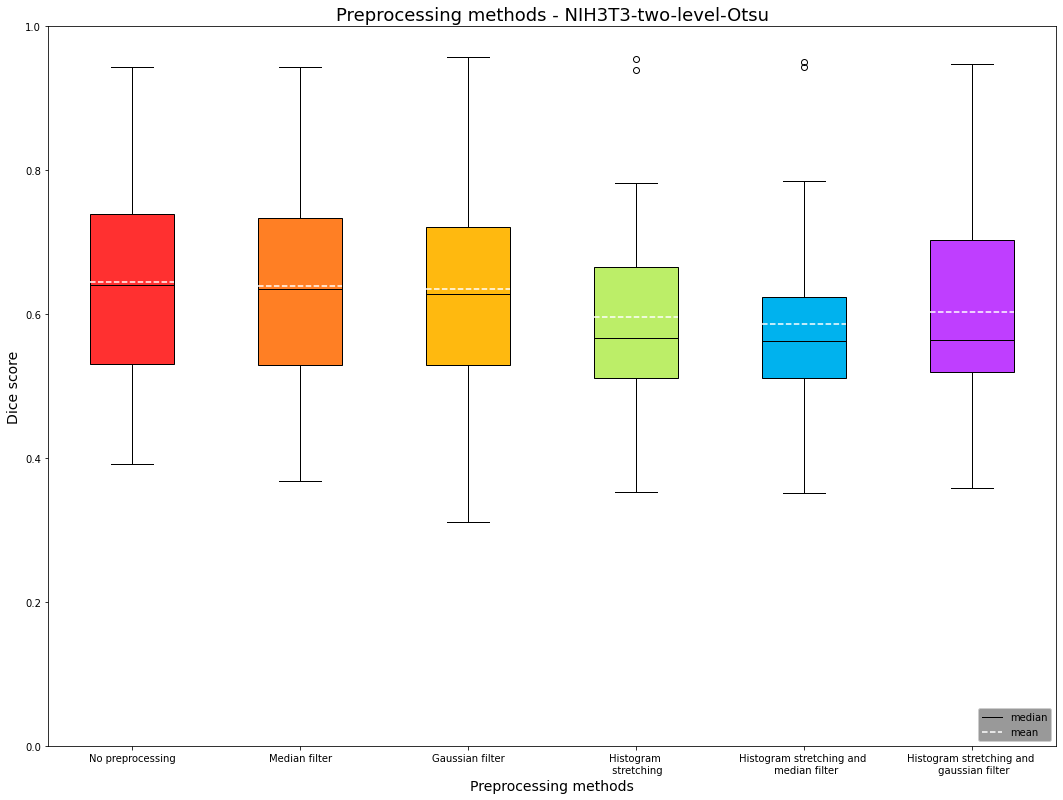

In [3]:
#data_N2DHGOWT1 = complete_analysis_two_level_otsu("N2DH-GOWT1")
#complete_analysis_two_level_otsu("N2DL-HeLa")
complete_analysis_two_level_otsu("NIH3T3")

#print(data_N2DHGOWT1)
#print(data_N2DLHeLa)
#print(data_NIH3T3)

Outputs für N2DH-GOWT1:

 [[0.0, 0.8889624027757476, 0.8914004434342448, 0.8840789866507442, 0.33920340995405707, 0.5561597953839595], [0.9012671046140265, 0.8003354141432963, 0.8060750740862693, 0.8040329829223495, 0.9048154915767894, 0.9191552972412177], [0.7662303527309047, 0.7369425080876567, 0.7558663816867688, 0.7491651963429038, 0.768441781064502, 0.7749977961803917], [0.278076857380293, 0.2609383555104371, 0.24393510648313446, 0.2602767963373487, 0.3373632903275149, 0.3799143721694078], [0.3138197026778522, 0.8741567625893696, 0.9050083529371654, 0.8690661744108373, 0.49894536447122195, 0.8315909833387781], [0.7819686672110059, 0.7588008782069258, 0.7630054738962743, 0.7593305129628566, 0.7953226903532989, 0.7921267739832506]]


Outputs für N2DL-HeLa: 


[[0.7526071842410197, 0.8466689021817907, 0.855040499229567, 0.8471211954730249], [0.7598938125382887, 0.8405772314270443, 0.8474572590408869, 0.8409187371445362], [0.7606575647812761, 0.788412330374216, 0.8166085047150391, 0.82446546193171], [0.8817603654829008, 0.9000374463509011, 0.8842740559972709, 0.8889154796216717], [0.8700360427340758, 0.887588753195115, 0.8729933192450179, 0.8818061156771657], [0.729649749225447, 0.7684169659322527, 0.8098099074861415, 0.8184926354945912]]

Output für NIH3T3: 

[[0.9417263695042412, 0.9439370328532631, 0.5938264317277092, 0.758336987687637, 0.7993590316749856, 0.7272126154647645, 0.6814227277548294, 0.7181630754976537, 0.39260486580391374, 0.6171748562804691, 0.6454109779570866, 0.41456195234474275, 0.49592209998602965, 0.5905319096281916, 0.5107143326635717, 0.6345225131588169, 0.7434112841158013, 0.40626796678720645], [0.9373094067699563, 0.9436865103037169, 0.5935842866848434, 0.7523092096313426, 0.7974643367247977, 0.7223394517512165, 0.6584341719952335, 0.6776240012382777, 0.3681077871126644, 0.6048974570895881, 0.6454520836896415, 0.4148055378061768, 0.47241217357204635, 0.5868839089031608, 0.50998098330757, 0.6248061787517993, 0.737465149556319, 0.44890112225653434], [0.9569821829556486, 0.9328497623475924, 0.6711450326298762, 0.7474865698335778, 0.7868571458252894, 0.705490089803852, 0.6386207357876104, 0.7021194963434909, 0.31145489797952874, 0.564789981809584, 0.6187987122162997, 0.42525248820732064, 0.47115926988964824, 0.5756822850435293, 0.5177353286264177, 0.5932253837916126, 0.7256383448339955, 0.47586841429164317], [0.9540559763416978, 0.9395241079084493, 0.5938264317277092, 0.7521172841345203, 0.7827439735092878, 0.5680031518333076, 0.5266004202926399, 0.5744347950674208, 0.5655727635809071, 0.39802859302259114, 0.512618527872317, 0.41456195234474275, 0.3530470588777169, 0.5888867196183458, 0.5107143326635717, 0.5575910635276661, 0.6897927754884456, 0.4520324380023766], [0.9502986673236443, 0.9428528250640201, 0.5935842866848434, 0.7494165741668246, 0.7849810780201824, 0.5680094021552271, 0.5238616202147273, 0.5720957469933069, 0.5588869913948393, 0.39694584334223115, 0.515085038285285, 0.39212785650453214, 0.3518292189099048, 0.5863167085142589, 0.50998098330757, 0.5132186414667635, 0.6337368614468762, 0.4016532270786345], [0.9470466869664593, 0.924853319691132, 0.6663443820736316, 0.7471727847617823, 0.7769520127687902, 0.5746349153667442, 0.533565259783613, 0.5843559144885135, 0.5400788376933879, 0.40046326593065135, 0.5306186158198161, 0.42108466189977456, 0.35923236295823535, 0.5785675996421106, 0.5157422822525556, 0.5531242023743564, 0.7144176814945022, 0.47984561417850424]]

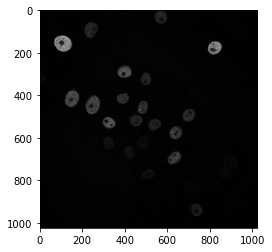

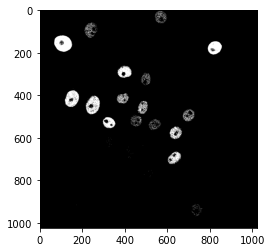

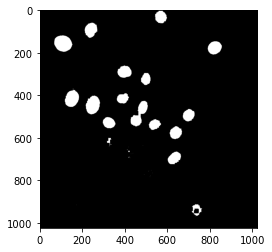

In [7]:

from nuclei_segmentation import preprocessing
from nuclei_segmentation import otsu
img = imread(r"data/Otsu_data/N2DH-GOWT1/img/t31.tif")
figure()
imshow(img, 'gray')
otsu_img = otsu.otsu_thresholding(img, 256)

figure()
imshow(otsu_img, 'gray')
noholes = preprocessing.holefilling(otsu_img, 15)
figure()
imshow(noholes, 'gray')

Hole filling für N2DH-GOWT1 muss noch rein


für clip und local brauchen wir noch die beste Y achsen ticks und ob stretch zuerst oder danach
hallo
hi

In [ ]:
def complete_analysis_two_level_otsu_clip(x):
   
    if x == 'NIH3T3' :
        
        img_NIH3T3 = []
        path = r"data/Otsu_data/NIH3T3/img"
        for f in os.listdir(path):
            img_NIH3T3.append(imread(os.path.join(path , f)))

        gt_NIH3T3 = []
        path = r"data/Otsu_data/NIH3T3/gt"
        for f in os.listdir(path):
            gt_NIH3T3.append(imread(os.path.join(path , f)))

        copy_img_NIH3T3 = img_NIH3T3.copy()

        median_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            median_img_NIH3T3.append(scipy.ndimage.median_filter(copy_img_NIH3T3[i] , 16))

        gauss_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(copy_img_NIH3T3[i] , 8))

        stretch_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            stretch_img_NIH3T3.append(pp.stretch(copy_img_NIH3T3[i]))

        median_stretch_img_NIH3T3 = []
        for i in range(0,len(median_img_NIH3T3)):
            median_stretch_img_NIH3T3.append(pp.stretch(median_img_NIH3T3[i]))

        stretch_median_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            stretch_median_img_NIH3T3.append(scipy.ndimage.median_filter(stretch_img_NIH3T3[i] , 16))

        gauss_stretch_img_NIH3T3 = []
        for i in range(0,len(gauss_img_NIH3T3)):
            gauss_stretch_img_NIH3T3.append(pp.stretch(gauss_img_NIH3T3[i]))

        stretch_gauss_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            stretch_gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(stretch_img_NIH3T3[i] , 8))

        otsu_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            otsu_img_NIH3T3.append(tlo.two_level_otsu_thresholding_clip(copy_img_NIH3T3[i] , 256))

        otsu_median_img_NIH3T3 = []
        for i in range(0,len(median_img_NIH3T3)):
            otsu_median_img_NIH3T3.append(tlo.two_level_otsu_thresholding_clip(median_img_NIH3T3[i] , 256))

        otsu_gauss_img_NIH3T3 = []
        for i in range(0,len(gauss_img_NIH3T3)):
            otsu_gauss_img_NIH3T3.append(tlo.two_level_otsu_thresholding_clip(gauss_img_NIH3T3[i] , 256))

        otsu_stretch_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            otsu_stretch_img_NIH3T3.append(tlo.two_level_otsu_thresholding_clip(stretch_img_NIH3T3[i] , 256))
        
        
        otsu_median_stretch_img_NIH3T3 = []
        for i in range(0,len(median_stretch_img_NIH3T3)):
            otsu_median_stretch_img_NIH3T3.append(tlo.two_level_otsu_thresholding_clip(median_stretch_img_NIH3T3[i] , 256))
        
        otsu_stretch_median_img_NIH3T3 = []
        for i in range(0,len(stretch_median_img_NIH3T3)):
            otsu_stretch_median_img_NIH3T3.append(tlo.two_level_otsu_thresholding_clip(stretch_median_img_NIH3T3[i] , 256))
        
        otsu_gauss_stretch_img_NIH3T3 = []
        for i in range(0,len(gauss_stretch_img_NIH3T3)):
            otsu_gauss_stretch_img_NIH3T3.append(tlo.two_level_otsu_thresholding_clip(gauss_stretch_img_NIH3T3[i] , 256))

        otsu_stretch_gauss_img_NIH3T3 = []
        for i in range(0,len(stretch_gauss_img_NIH3T3)):
            otsu_stretch_gauss_img_NIH3T3.append(tlo.two_level_otsu_thresholding_clip(stretch_gauss_img_NIH3T3[i] , 256))

        dice_otsu_img_NIH3T3 = []
        for j in range(0,len(otsu_img_NIH3T3)):
            dice_otsu_img_NIH3T3.append(dsc.dice(otsu_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_median_img_NIH3T3 = []
        for j in range(0,len(otsu_median_img_NIH3T3)):
            dice_otsu_median_img_NIH3T3.append(dsc.dice(otsu_median_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_gauss_img_NIH3T3 = []
        for j in range(0,len(otsu_gauss_img_NIH3T3)):
            dice_otsu_gauss_img_NIH3T3.append(dsc.dice(otsu_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        dice_otsu_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_img_NIH3T3)):
            dice_otsu_stretch_img_NIH3T3.append(dsc.dice(otsu_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        dice_otsu_median_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_median_stretch_img_NIH3T3)):
            dice_otsu_median_stretch_img_NIH3T3.append(dsc.dice(otsu_median_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_stretch_median_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_median_img_NIH3T3)):
            dice_otsu_stretch_median_img_NIH3T3.append(dsc.dice(otsu_stretch_median_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        #dice_both_stretch_median = [dice_otsu_median_stretch_img_NIH3T3 , dice_otsu_stretch_median_img_NIH3T3]
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(st.median(dice_both_stretch_median))]
        
        
        median1 = st.median(dice_otsu_median_stretch_img_NIH3T3)
        median2 = st.median(dice_otsu_stretch_median_img_NIH3T3)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_NIH3T3
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_NIH3T3

        dice_otsu_gauss_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_gauss_stretch_img_NIH3T3)):
            dice_otsu_gauss_stretch_img_NIH3T3.append(dsc.dice(otsu_gauss_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        dice_otsu_stretch_gauss_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_gauss_img_NIH3T3)):
            dice_otsu_stretch_gauss_img_NIH3T3.append(dsc.dice(otsu_stretch_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_NIH3T3, dice_otsu_stretch_gauss_img_NIH3T3]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]
        
        median3 = st.median(dice_otsu_gauss_stretch_img_NIH3T3)
        median4 = st.median(dice_otsu_stretch_gauss_img_NIH3T3)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_NIH3T3
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_NIH3T3
        

        data_NIH3T3 = [dice_otsu_img_NIH3T3 , dice_otsu_median_img_NIH3T3 , dice_otsu_gauss_img_NIH3T3 , dice_otsu_stretch_img_NIH3T3 , optimal_dice_stretch_median , optimal_dice_stretch_gauss]

        boxplot = pp.dataset_boxplot_otsu(data_NIH3T3 , 'Preprocessing methods - NIH3T3-two-level-Otsu')        
   
    return boxplot

In [ ]:
complete_analysis_two_level_otsu_clip('NIH3T3')